# Ignore Warnings

In [1]:
import warnings
warnings.simplefilter("ignore")

# liberaries

In [2]:
# Data analysis liberaries:
import pandas as pd
import numpy as np

# Visualisation Liberaries:
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

#modeling
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              ExtraTreesRegressor, 
                              GradientBoostingRegressor,
                              BaggingClassifier,
                              VotingRegressor)

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_predict
import time
from scipy.stats import randint

#metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, accuracy_score, roc_auc_score, f1_score

import missingno as msno

# Import training datasets

In [3]:
train1 = pd.read_csv("D:\SelfStudy\DataScience\DataSets\ieee-mansb-victoris-2\IEEE_Victoris2_Filtration_train_data\Train_Batch_1.csv")
train2 = pd.read_csv("D:\SelfStudy\DataScience\DataSets\ieee-mansb-victoris-2\IEEE_Victoris2_Filtration_train_data\Train_Batch_2.csv")
train3 = pd.read_csv("D:\SelfStudy\DataScience\DataSets\ieee-mansb-victoris-2\IEEE_Victoris2_Filtration_train_data\Train_Batch_3.csv")

test = pd.read_csv(r"D:\SelfStudy\DataScience\DataSets\ieee-mansb-victoris-2\test.csv")

In [4]:
train1.shape

(19440, 17)

In [5]:
train2.shape

(12956, 18)

In [6]:
train3.shape

(6466, 19)

we want to merge these datasets into one dataset

In [7]:
# To show all columns
pd.set_option("display.max_columns", None) 

# first row of train1 dataset
train1.head(1)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575


In [8]:
# first row of train2 dataset
train2.head(1)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.5,1734.5,503.07,335.38,287.127


In [9]:
# first row of train2 dataset
train3.head(1)

,Unnamed: 0,Person%20Description,Place%20Code,Customer%20Order,Additional%20Features%20in%20market,Promotion%20Name,Store%20Kind,Store%20Sales,Store%20Cost,Gross%20Weight,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
0,mc_ID_0,"Single Female with two children, education: pa...",T02ma_WA,"Meat from Deli department, Ordered Brand : Red...","['Coffee Bar', 'Florist', 'Ready Food', 'Bar F...",Sale : Double Down,Deluxe,7.12 Millions,2.5632 Millions,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,90K+,3145.51,2056.79,654.13,436.09,500.7202


In [10]:
train1["Product Weights Data in (KG)"][1]

"{'Gross Weight': 16.571, 'Net Weight': 14.972, 'Package Weight': 1.599}"

<div class="alert alert-block alert-info">
<b>From comparing the three datasets:</b>

- I will extract `Gross Weight`, `Net Weight` and `Package Weight` from `Product Weights Data in (KG)` column in train1 dataset
    
- I will add `Package Weight` column in train2 and train3
    
- I will use columns names of train2 dataset as columns names of my final dataset
    
</div>

In [11]:
# Replace `Product Weights Data in (KG)` column with three columns

Gross_Weight = []
Net_Weight = []
Package_Weight = []

for weight in train1["Product Weights Data in (KG)"]:
    weight = eval(weight)
    
    Gross_Weight.append(list(weight.values())[0])
    Net_Weight.append(list(weight.values())[1])
    Package_Weight.append(list(weight.values())[2])
    
train1.insert(9, "Gross Weight", Gross_Weight)
train1.insert(10, "Net Weight", Net_Weight)
train1.insert(11, "Package Weight", Package_Weight)

# Drop `Product Weights Data in (KG)` column in train1
train1.drop(["Product Weights Data in (KG)"], axis=1, inplace=True)

In [12]:
# Drop `Product Weights Data in (KG)` column in train3
train3.drop(["Weights%20Data"], axis=1, inplace=True)

# Clean columns names of train3
train3.columns = train2.columns

In [13]:
# Add `Package Weight` in train1 and train2

train2.insert(11, "Package Weight", train2["Gross Weight"]-train2["Net Weight"])
train3.insert(11, "Package Weight", train3["Gross Weight"]-train3["Net Weight"])

In [14]:
# Make columns names in train1 the same as them in train2
train1.columns = train2.columns

# Concatenate the three dataframes
train = pd.concat([train1, train2, train3], ignore_index=True)


In [15]:
train.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,28.1997,26.6008,1.5990,recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,16.5710,14.9720,1.5990,non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,28.6358,27.1822,1.4536,recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,14.2161,11.2944,2.9217,recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,11.56 Millions,4.9708 Millions,12.6172,9.7100,2.9072,non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38862 entries, 0 to 38861
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     38862 non-null  object 
 1   Person Description             38862 non-null  object 
 2   Place Code                     38862 non-null  object 
 3   Customer Order                 38860 non-null  object 
 4   Additional Features in market  34562 non-null  object 
 5   Promotion Name                 33034 non-null  object 
 6   Store Kind                     33053 non-null  object 
 7   Store Sales                    38847 non-null  object 
 8   Store Cost                     38855 non-null  object 
 9   Gross Weight                   35945 non-null  float64
 10  Net Weight                     35969 non-null  float64
 11  Package Weight                 33496 non-null  float64
 12  Is Recyclable?                 38860 non-null 

<div class="alert alert-block alert-info">
<b>data type of 'Store Area', 'Grocery Area', 'Frozen Area' and 'Meat Area' columns should be numeric</b>
</div>

In [17]:
for col in ['Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area']:
    train[col] = pd.to_numeric(train[col], errors='coerce')

In [18]:
# Number of missing values in each column
train.isna().sum()

Unnamed: 0                          0
Person Description                  0
Place Code                          0
Customer Order                      2
Additional Features in market    4300
Promotion Name                   5828
Store Kind                       5809
Store Sales                        15
Store Cost                          7
Gross Weight                     2917
Net Weight                       2893
Package Weight                   5366
Is Recyclable?                      2
Min. Person Yearly Income           8
Store Area                       3566
Grocery Area                     3609
Frozen Area                      3554
Meat Area                        3550
Cost                               31
dtype: int64

In [19]:
#train = train.dropna()

<AxesSubplot:>

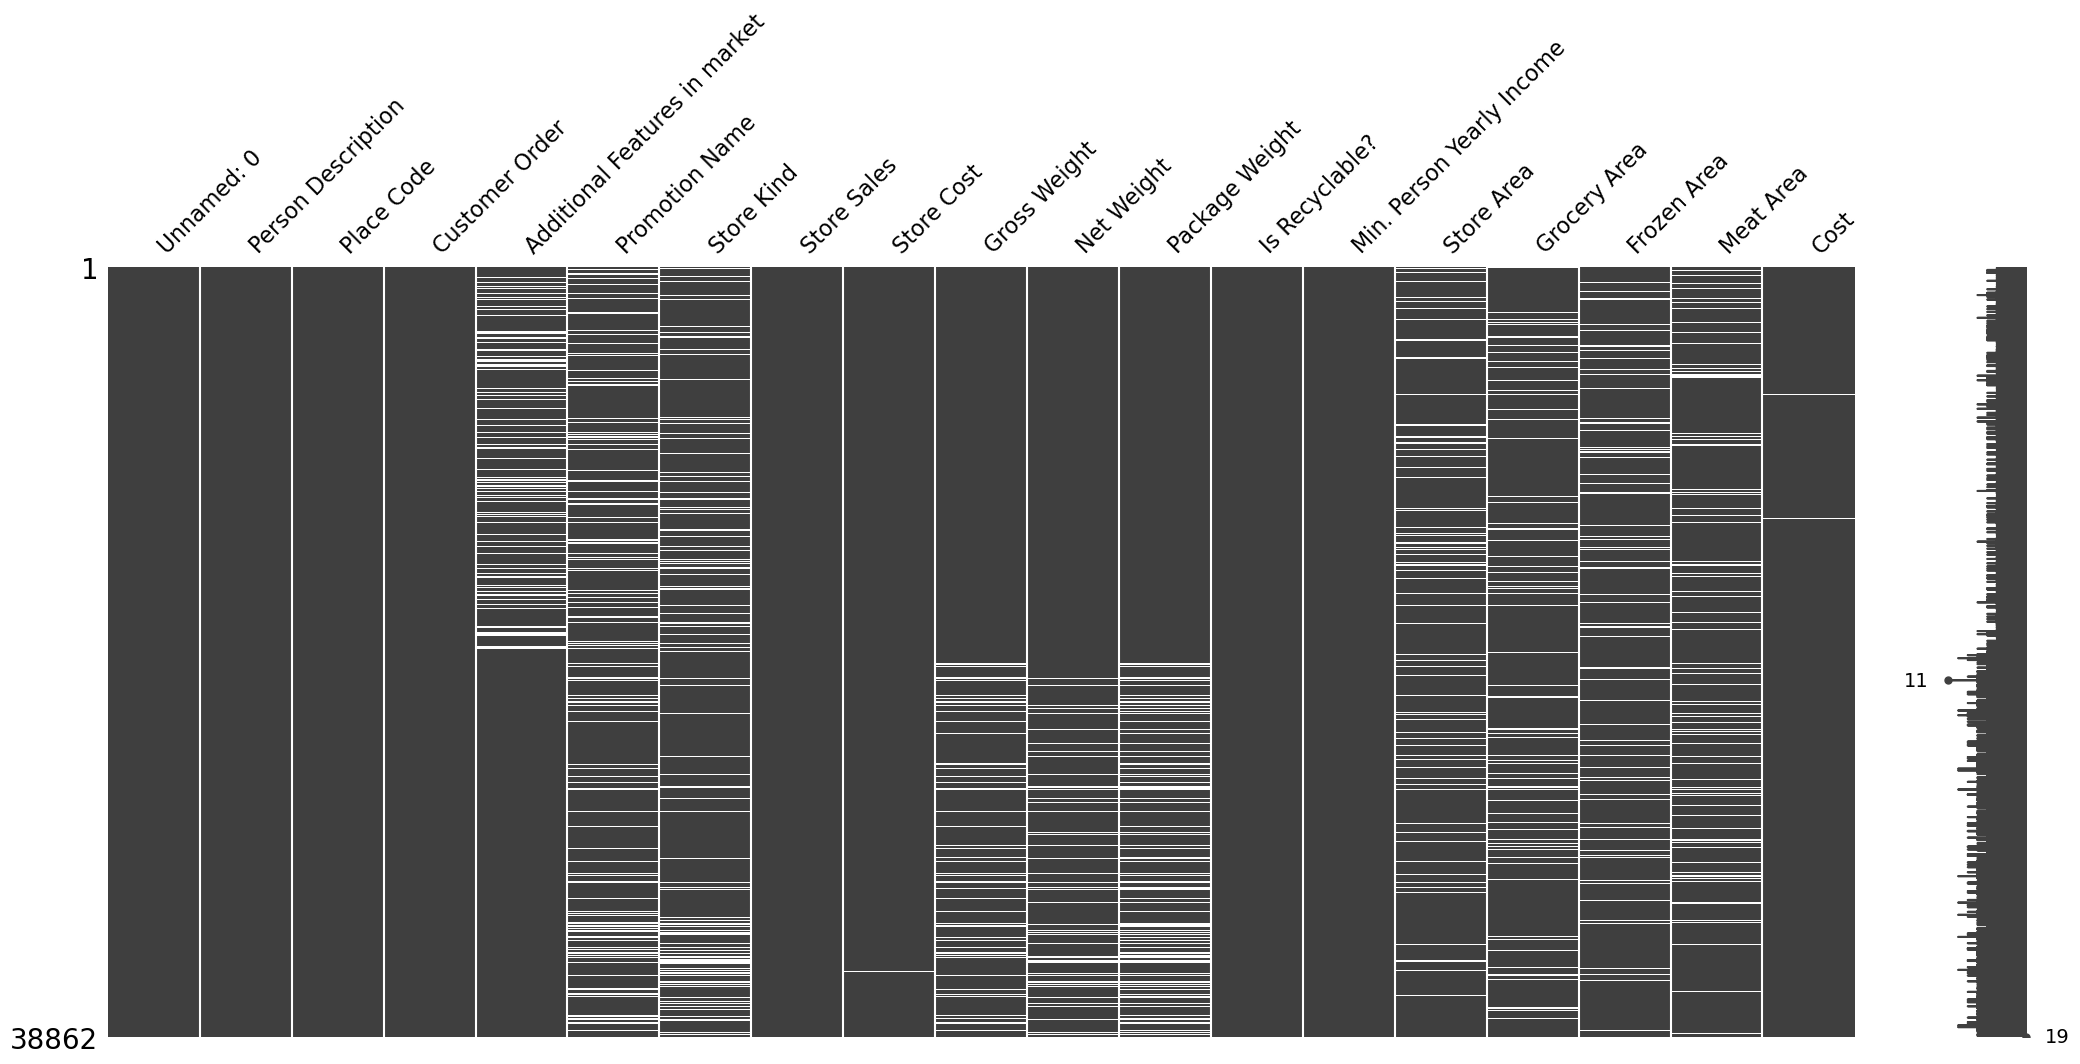

In [20]:
msno.matrix(train)

# Cleaning columns:

<div class="alert alert-block alert-info">
<b>I will drop `Unnamed: 0` column as it is not important. </b>
</div>

In [21]:
train.drop(["Unnamed: 0"], axis=1, inplace=True)

## `Person Description` column

In [22]:
train["Person Description"].unique()[:10]

array(['Single Female with four children, education: bachelors degree working as professional',
       'Single Female with three children, education: bachelors degree working as management',
       'Married Male with two children, education: high school degree working as skilled manual',
       'Single Female with three children, education: partial college working as professional',
       'Married Female with five children, education: bachelors degree working as professional',
       'Single Male with four children, education: high school degree working as manual',
       'Married Female with five children, education: high school degree working as professional',
       'Married Male with four children, education: partial high school working as skilled manual',
       'Married Male with five children, education: high school degree working as skilled manual',
       'Single Male with one child, education: high school degree working as manual'],
      dtype=object)

<div class="alert alert-block alert-info">
<b>I will extract five columns from this column</b>
</div>

In [23]:
Status = []
Gender = []
Children = []
Education = []
Work = []

for person in train["Person Description"]:
    Status.append(person.split()[0])
    Gender.append(person.split()[1])
    Children.append(person.split()[3])
    Education.append(person.split(": ")[1].split(" working as ")[0])
    Work.append(person.split(": ")[1].split(" working as ")[1])

# Add the new columns
train.insert(1, "Status", Status)
train.insert(2, "Gender", Gender)
train.insert(3, "Children", Children)
train.insert(4, "Education", Education)
train.insert(5, "Work", Work)
# Drop the original column
train.drop(["Person Description"], axis=1, inplace=True)

In [24]:
train.head(1)

,Status,Gender,Children,Education,Work,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,Single,Female,four,bachelors degree,professional,H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,28.1997,26.6008,1.599,recyclable,10K+,2842.23,2037.64,481.98,323.0,602.7575


<div class="alert alert-block alert-info">
<b>As we see the new columns has been added successfully.</b>
    
<b>Now lets take a look at these columns.</b>
</div>

In [25]:
train["Status"].value_counts()

Single     19620
Married    19242
Name: Status, dtype: int64

In [26]:
train["Gender"].value_counts()

Female    19900
Male      18962
Name: Gender, dtype: int64

In [27]:
train["Children"].value_counts()

two      8035
four     7995
three    7708
one      7567
five     3903
No       3654
Name: Children, dtype: int64

<div class="alert alert-block alert-info">
<b>I will replace these text values with numeric values</b>
</div>

In [28]:
train["Children"] = train["Children"].replace({"No":0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5})

In [29]:
train["Education"].value_counts()

partial high school    11685
high school degree     11442
bachelors degree       10308
partial college         3419
graduate degree         2008
Name: Education, dtype: int64

In [30]:
train["Work"].value_counts()

professional      12880
skilled manual    10220
manual             9449
management         5615
clerical            698
Name: Work, dtype: int64

## `Place Code` column

In [31]:
train["Place Code"].value_counts()

T02ma_WA    3657
S01em_OR    3537
P07nd_OR    3282
S03le_WA    3245
H11go_ZA    3033
M10da_YU    2925
S04ne_WA    2879
B06ls_CA    2693
L05es_CA    2588
B14on_WA    2201
V13er_BC    2176
O09ba_VE    1660
C15ho_ZA    1497
A17co_GU    1000
M12ty_DF     881
S18co_CA     497
B08am_WA     473
V19ia_BC     355
G16ra_JA     283
Name: Place Code, dtype: int64

<div class="alert alert-block alert-info">
<b>I will split the place code into two codes</b>
</div>

In [32]:
code1 = []
code2 = []

for code in train["Place Code"]:
    code1.append(code.split('_')[0])
    code2.append(code.split('_')[1])
    
    
train.insert(5, "Place Code1", code1)
train.insert(6, "Place Code2", code2)

# Drop the original column
train.drop(["Place Code"], axis=1, inplace=True)

In [33]:
train.head(1)

,Status,Gender,Children,Education,Work,Place Code1,Place Code2,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,Single,Female,4,bachelors degree,professional,H11go,ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,28.1997,26.6008,1.599,recyclable,10K+,2842.23,2037.64,481.98,323.0,602.7575


In [34]:
train["Place Code1"].value_counts()

T02ma    3657
S01em    3537
P07nd    3282
S03le    3245
H11go    3033
M10da    2925
S04ne    2879
B06ls    2693
L05es    2588
B14on    2201
V13er    2176
O09ba    1660
C15ho    1497
A17co    1000
M12ty     881
S18co     497
B08am     473
V19ia     355
G16ra     283
Name: Place Code1, dtype: int64

In [35]:
train["Place Code2"].value_counts()

WA    12455
OR     6819
CA     5778
ZA     4530
YU     2925
BC     2531
VE     1660
GU     1000
DF      881
JA      283
Name: Place Code2, dtype: int64

## `Customer Order` column

In [36]:
#There are only two missing values in this column, so I will drop these rows 
train.dropna(axis=0, subset=["Customer Order"], inplace=True)

In [37]:
train["Customer Order"].unique()[:5]

array(['Cleaning Supplies from Household department, Ordered Brand : Red Wing',
       'Snack Foods from Snack Foods department, Ordered Brand : Nationeel',
       'Magazines from Periodicals department, Ordered Brand : Excel',
       'Dairy from Dairy department, Ordered Brand : Carlson',
       'Vegetables from Produce department, Ordered Brand : Hermanos'],
      dtype=object)

<div class="alert alert-block alert-info">
<b>We can extract 3 features from this column:</b>
    
1- Order
    
2- Department
    
3- Brand
</div>

In [38]:
Order = []
Department = []
Brand = []

for value in train["Customer Order"]:
    Order.append(value.split(' from ')[0])
    Department.append(value.split(', ')[0].split(' from ')[1])
    Brand.append(value.split(' : ')[1])
    
train.insert(7, 'Order', Order)
train.insert(8, 'Department', Department)
train.insert(9, 'Brand', Brand)

train.drop(["Customer Order"], axis=1, inplace=True)

In [39]:
train.head(1)

,Status,Gender,Children,Education,Work,Place Code1,Place Code2,Order,Department,Brand,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,Single,Female,4,bachelors degree,professional,H11go,ZA,Cleaning Supplies,Household department,Red Wing,"['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,28.1997,26.6008,1.599,recyclable,10K+,2842.23,2037.64,481.98,323.0,602.7575


## `Additional Features in market` column

In [40]:
train["Additional Features in market"].nunique()

151

In [41]:
train["Additional Features in market"].unique()[:5]

array(["['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']",
       nan, "['Florist']", "['Coffee Bar']",
       "['Bar For Salad', 'Ready Food', 'Coffee Bar', 'Video Store', 'Florist']"],
      dtype=object)

<div class="alert alert-block alert-info">
<b>This column has many unique values, so I will use the number of additional features instead</b>
</div>

In [42]:
# Replacing missing values by empty list
train["Additional Features in market"] = train["Additional Features in market"].fillna('[]')

In [43]:
features_num = train["Additional Features in market"].apply(lambda x : len(eval(x)))

In [44]:
# Adding the new column
train.insert(10, "Additional Features Number",features_num)

# Drop the original column
train.drop(["Additional Features in market"], axis=1, inplace=True)

In [45]:
train.head(1)

,Status,Gender,Children,Education,Work,Place Code1,Place Code2,Order,Department,Brand,Additional Features Number,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,Single,Female,4,bachelors degree,professional,H11go,ZA,Cleaning Supplies,Household department,Red Wing,5,Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,28.1997,26.6008,1.599,recyclable,10K+,2842.23,2037.64,481.98,323.0,602.7575


## `Promotion Name` column

In [46]:
train["Promotion Name"].value_counts()

Save Price                  1287
Weekend Discount            1279
Two Day Sale                1258
Price Winners               1157
Super Savers                1086
Save It (Sale)              1074
Super Duper Savers          1066
One Day Sale                1010
Roller Savings (High)        992
Sale : Double Down           970
GLD                          966
Price Slashers               941
Shelf Clearing Days          909
Full Free                    892
Lottery Cash Registerion     828
Go For It                    812
Two for One                  803
Money Savers                 790
Big Time Discounts           771
Price Destroyers             739
Saving Days                  721
Budget Bargains              720
Discount Frenzy              667
Best Price Savers            652
Dimes Off                    636
Promo Big                    607
You Save Days                605
Savings Galore               596
Price Cutters                589
Sales Days                   586
Bag Stuffe

## `Store Kind` column

In [47]:
train['Store Kind'].value_counts()

Supermarket      14315
Deluxe           12601
Gourmet           3553
Mid-Size          1497
Small Grocery     1085
Name: Store Kind, dtype: int64

## `Is Recyclable?` column

In [48]:
train['Is Recyclable?'].value_counts()

recyclable        10848
yes               10779
no                 8639
non recyclable     8592
Name: Is Recyclable?, dtype: int64

<div class="alert alert-block alert-info">
<b>values 'recyclable' and 'yes' are the same also values 'non recyclable' and 'no' are the same. I will fix that.</b>
</div>

In [49]:
train['Is Recyclable?'] = train['Is Recyclable?'].replace({'yes':'recyclable', 'no':'non recyclable'})

In [50]:
train['Is Recyclable?'].value_counts()

recyclable        21627
non recyclable    17231
Name: Is Recyclable?, dtype: int64

In [51]:
train.isna().sum()

Status                           0
Gender                           0
Children                         0
Education                        0
Work                             0
Place Code1                      0
Place Code2                      0
Order                            0
Department                       0
Brand                            0
Additional Features Number       0
Promotion Name                5828
Store Kind                    5809
Store Sales                     15
Store Cost                       7
Gross Weight                  2917
Net Weight                    2893
Package Weight                5366
Is Recyclable?                   2
Min. Person Yearly Income        8
Store Area                    3566
Grocery Area                  3609
Frozen Area                   3554
Meat Area                     3550
Cost                            31
dtype: int64

## `Store Sales` `Store Cost`  columns

In [52]:
import re

def unique_units(column):
    """
    -Take one parameter (column)
    -Print unique units in this column
    """
    units = []
    #for x in train.loc[~train[column].isna()][column].tolist():
    for x in train[column].astype('str'):
        unit = re.findall('[a-zA-Z]+', x)
        if unit not in units:
            units.append(unit)
    print(units)

In [53]:
def extract_number(data, column):
    """
    -Take one parameter (column)
    -return only numbers without the units
    """
    nums = []
    for x in data[column].astype('str'):
        num = re.findall('\d+', x)
        if len(num)==2:
            num = str(num[0]) + '.' + str(num[1])
            nums.append(num)
        elif len(num)==1:
            nums.append(num[0])
        else:
            nums.append(np.nan)
    return nums

In [54]:
unique_units("Store Sales")

[['Millions'], ['M'], ['nan']]


In [55]:
unique_units("Store Cost")

[['Millions'], ['M'], ['nan']]


<div class="alert alert-block alert-info">
<b>values have the same unit, so i will simply extract the number</b>
</div>

In [56]:
train["Store Sales"] = pd.Series(extract_number(train, "Store Sales")).astype('float')

In [57]:
train["Store Cost"] = pd.Series(extract_number(train, "Store Cost")).astype('float')

## `Yearly Income` column

In [58]:
train = train.rename(columns={'Min. Person Yearly Income':'Yearly Income'})

In [59]:
train["Yearly Income"].value_counts()

30K+      12467
10K+       8373
50K+       6750
70K+       4824
130K+      2171
90K+       1782
110K+      1685
150K+       799
130K+.        1
Name: Yearly Income, dtype: int64

In [60]:
train["Yearly Income"] = train["Yearly Income"].replace({'130K+.':'130K+'})

In [61]:
train.head()

,Status,Gender,Children,Education,Work,Place Code1,Place Code2,Order,Department,Brand,Additional Features Number,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,Single,Female,4,bachelors degree,professional,H11go,ZA,Cleaning Supplies,Household department,Red Wing,5,Dimes Off,Deluxe,8.76,4.2924,28.1997,26.6008,1.5990,recyclable,10K+,2842.23,2037.64,481.98,323.00,602.7575
1,Single,Female,3,bachelors degree,management,S04ne,WA,Snack Foods,Snack Foods department,Nationeel,0,Budget Bargains,Supermarket,6.36,1.9716,16.5710,14.9720,1.5990,non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,Married,Male,2,high school degree,skilled manual,L05es,CA,Magazines,Periodicals department,Excel,1,Shelf Emptiers,Supermarket,10.86,4.4526,28.6358,27.1822,1.4536,recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,Single,Female,3,partial college,professional,S03le,WA,Dairy,Dairy department,Carlson,1,Savings Galore,NaN,1.98,0.6732,14.2161,11.2944,2.9217,recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119
4,Married,Female,5,bachelors degree,professional,M10da,YU,Vegetables,Produce department,Hermanos,5,Sale Winners,Deluxe,11.56,4.9708,12.6172,9.7100,2.9072,non recyclable,50K+,2862.30,1872.19,593.93,395.95,519.7574


In [62]:
train.shape

(38860, 25)

In [63]:
train.duplicated().sum()

8

In [64]:
train = train.drop_duplicates()

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38852 entries, 0 to 38861
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Status                      38852 non-null  object 
 1   Gender                      38852 non-null  object 
 2   Children                    38852 non-null  int64  
 3   Education                   38852 non-null  object 
 4   Work                        38852 non-null  object 
 5   Place Code1                 38852 non-null  object 
 6   Place Code2                 38852 non-null  object 
 7   Order                       38852 non-null  object 
 8   Department                  38852 non-null  object 
 9   Brand                       38852 non-null  object 
 10  Additional Features Number  38852 non-null  int64  
 11  Promotion Name              33024 non-null  object 
 12  Store Kind                  33044 non-null  object 
 13  Store Sales                 388

In [66]:
train.isna().sum()

Status                           0
Gender                           0
Children                         0
Education                        0
Work                             0
Place Code1                      0
Place Code2                      0
Order                            0
Department                       0
Brand                            0
Additional Features Number       0
Promotion Name                5828
Store Kind                    5808
Store Sales                     17
Store Cost                       9
Gross Weight                  2917
Net Weight                    2893
Package Weight                5366
Is Recyclable?                   2
Yearly Income                    8
Store Area                    3565
Grocery Area                  3608
Frozen Area                   3553
Meat Area                     3548
Cost                            31
dtype: int64

In [67]:
#train.dropna(subset=['Promotion Name', 'Store Kind'],inplace=True)

In [68]:
train.dropna(subset=['Cost', 'Store Sales', 'Is Recyclable?', 'Yearly Income'], inplace=True)

<div class="alert alert-block alert-info">
<b> About 55% of 'Grocery Area' and 'Meat Area' are missing values</b>
</div>

In [69]:
train.describe()

,Children,Additional Features Number,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
count,38795.000000,38795.000000,38795.000000,38788.000000,35879.000000,35909.000000,33437.000000,35233.000000,35191.000000,35251.000000,35251.000000,38795.000000
mean,2.528238,2.707205,6.530918,2.612510,20.063312,17.136930,2.926824,2597.920917,1775.561302,493.507998,328.916277,519.246255
std,1.488834,2.072854,3.464088,1.450274,6.715769,6.810637,1.010893,528.767854,371.347515,145.974337,97.113413,156.873414
min,0.000000,0.000000,0.510000,0.163200,8.721600,4.433500,1.453500,1882.700000,1233.080000,227.800000,149.900000,265.631700
25%,1.000000,1.000000,3.800000,1.494150,14.056200,11.207200,2.907100,2189.400000,1507.555000,440.920000,293.270000,364.269500
50%,3.000000,2.000000,5.920000,2.375400,19.768900,16.861700,2.907200,2572.860000,1734.500000,470.270000,313.550000,515.259600
75%,4.000000,5.000000,8.670000,3.477600,25.728600,23.257500,3.052500,2863.830000,2052.620000,534.290000,356.190000,662.222600
max,5.000000,5.000000,19.900000,9.726500,31.833700,30.234700,4.506200,7857.550000,8103.200000,1783.640000,570.740000,783.192500


In [70]:
train.describe(include='object')

,Status,Gender,Education,Work,Place Code1,Place Code2,Order,Department,Brand,Promotion Name,Store Kind,Is Recyclable?,Yearly Income
count,38795,38795,38795,38795,38795,38795,38795,38795,38795,32973,32991,38795,38795
unique,2,2,5,5,19,10,45,22,111,49,5,2,8
top,Single,Female,partial high school,professional,T02ma,WA,Vegetables,Produce department,Hermanos,Save Price,Supermarket,recyclable,30K+
freq,19592,19862,11662,12856,3653,12432,4896,5566,1208,1286,14289,21590,12455


In [71]:
for column in train.select_dtypes('object').columns:
    print(column)
    print(train[column].unique())
    print("--------------------")

Status
['Single' 'Married']
--------------------
Gender
['Female' 'Male']
--------------------
Education
['bachelors degree' 'high school degree' 'partial college'
 'partial high school' 'graduate degree']
--------------------
Work
['professional' 'management' 'skilled manual' 'manual' 'clerical']
--------------------
Place Code1
['H11go' 'S04ne' 'L05es' 'S03le' 'M10da' 'A17co' 'O09ba' 'S01em' 'P07nd'
 'B06ls' 'T02ma' 'V19ia' 'G16ra' 'B14on' 'C15ho' 'V13er' 'M12ty' 'B08am'
 'S18co']
--------------------
Place Code2
['ZA' 'WA' 'CA' 'YU' 'GU' 'VE' 'OR' 'BC' 'JA' 'DF']
--------------------
Order
['Cleaning Supplies' 'Snack Foods' 'Magazines' 'Dairy' 'Vegetables'
 'Candles' 'Pain Relievers' 'Beer and Wine' 'Frozen Desserts'
 'Breakfast Foods' 'Bread' 'Baking Goods' 'Starchy Foods' 'Drinks'
 'Electrical' 'Meat' 'Hardware' 'Hot Beverages' 'Canned Tuna'
 'Jams and Jellies' 'Fruit' 'Hygiene' 'Miscellaneous' 'Canned Shrimp'
 'Cold Remedies' 'Kitchen Products' 'Candy' 'Paper Products'
 'Canned S

# EDA

In [72]:
#define function to show histogram and boxplot for each column in the dataset
def plot_hist_and_boxplot(data , columns):
    # Create subplots based on the number of columns
    fig , axes = plt.subplots(nrows = len(columns), ncols = 2 , figsize = (12,40))
    # Flatten the axes for easier indexing
    axes = axes.flatten()
    # Loop through each column and plot histogram and boxplot
    for i, column in enumerate(columns):
        # histplot
        sns.histplot(data[column],kde = True,ax = axes[i*2])
        #set title
        axes[i*2].set_title(f'{column} - KDE Plot')

        # Boxplot
        sns.boxplot(x=data[column],ax=axes[i*2+1])
        #set title
        axes[i*2+1].set_title(f'{column} - Boxplot')

    # Adjust layout
    plt.tight_layout()
    #show the plot
    plt.show()

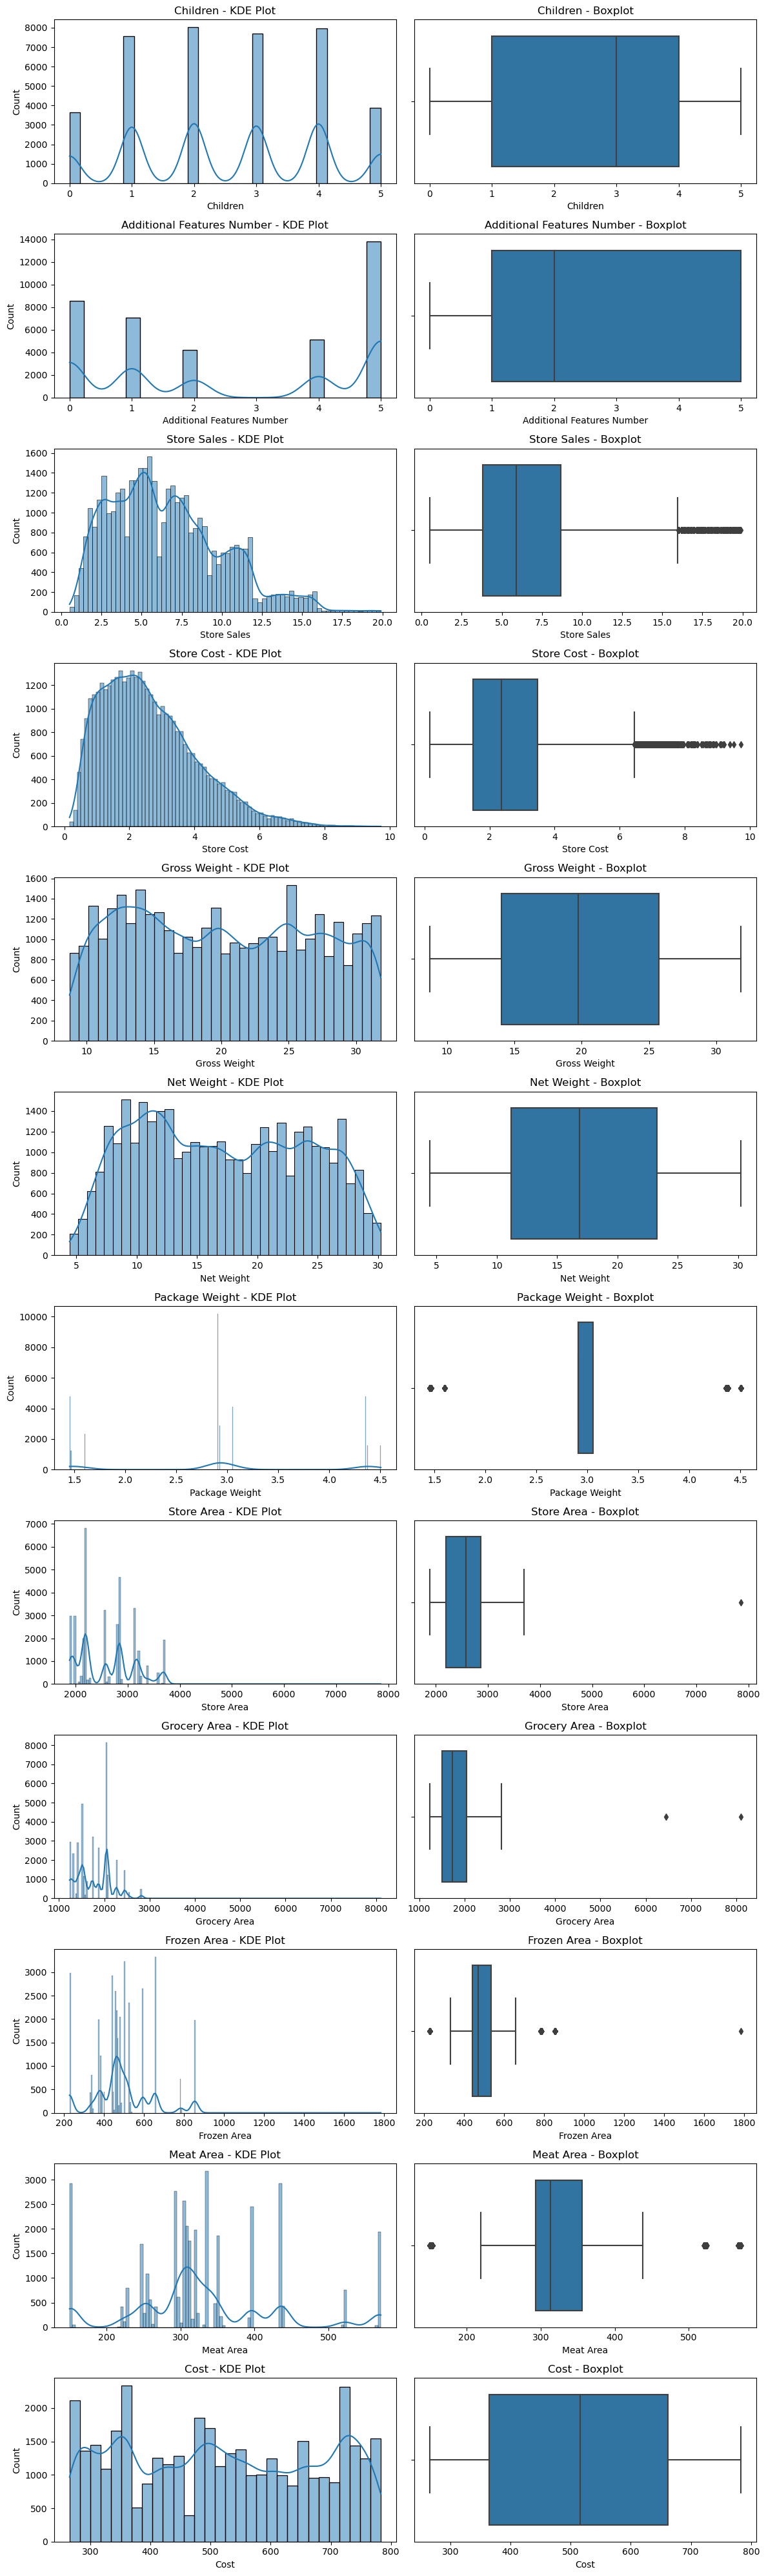

In [73]:
numeric_columns = train.select_dtypes(include=['number']).columns.tolist()
plot_hist_and_boxplot(train, numeric_columns)

In [74]:
def detect_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    IQR = q3 - q1

    outliers = data[(data[column] < q1-1.5*IQR) | (data[column] > q3+1.5*IQR)]
    outliers_percentage = round(len(outliers)/len(data)*100, 2)
    print(f"Percentage of outliers in {column} is: {outliers_percentage}\n---------------------------------------")
    

In [75]:
def remove_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    IQR = q3 - q1
    return data[~((data[column] < q1-1.5*IQR) | (data[column] > q3+1.5*IQR))]

In [76]:
numeric_columns = train.select_dtypes(include=['number']).columns.tolist()
for column in numeric_columns:
    detect_outliers(train, column)

Percentage of outliers in Children is: 0.0
---------------------------------------
Percentage of outliers in Additional Features Number is: 0.0
---------------------------------------
Percentage of outliers in Store Sales is: 0.5
---------------------------------------
Percentage of outliers in Store Cost is: 1.6
---------------------------------------
Percentage of outliers in Gross Weight is: 0.0
---------------------------------------
Percentage of outliers in Net Weight is: 0.0
---------------------------------------
Percentage of outliers in Package Weight is: 41.87
---------------------------------------
Percentage of outliers in Store Area is: 0.0
---------------------------------------
Percentage of outliers in Grocery Area is: 0.01
---------------------------------------
Percentage of outliers in Frozen Area is: 14.84
---------------------------------------
Percentage of outliers in Meat Area is: 14.82
---------------------------------------
Percentage of outliers in Cost is: 

<div class="alert alert-block alert-info">
<b> I will drop outliers with percentage less than 5% of our data</b>
</div>

In [77]:
columns_outliers_drop = ["Store Sales", "Store Cost", "Grocery Area", "Meat Area"]
for column in columns_outliers_drop:
    train = remove_outliers(train, column)

<AxesSubplot:>

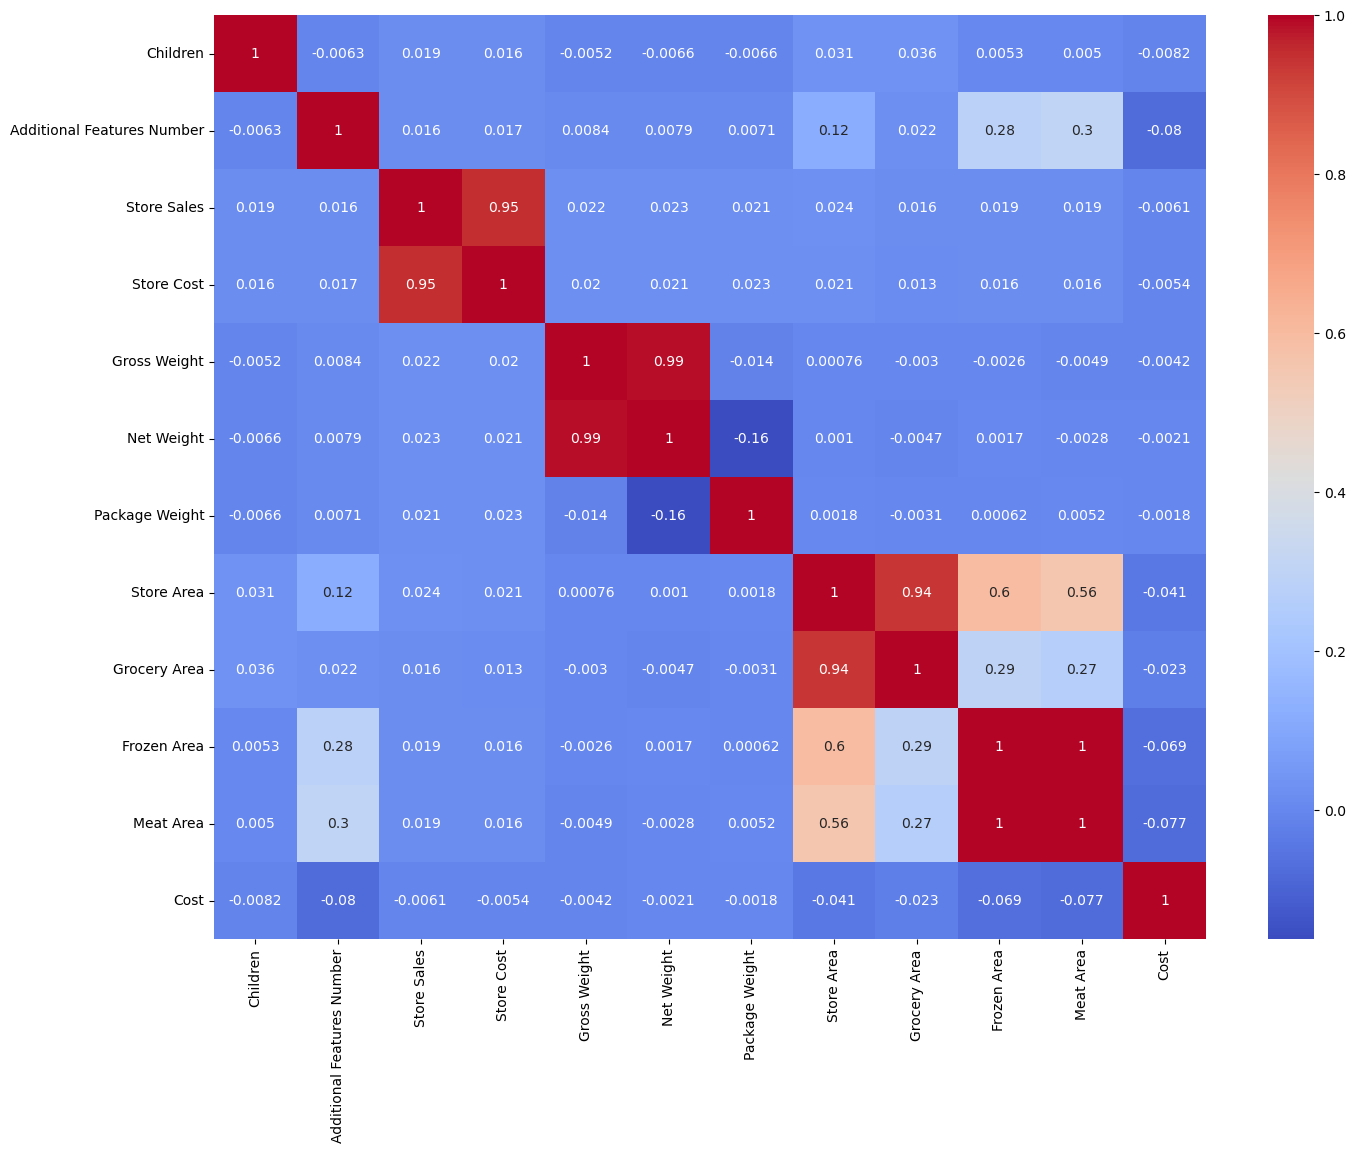

In [78]:
features = train.select_dtypes(exclude='object')
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(train[list(features.columns)].corr(), cmap = 'coolwarm', annot = True, ax=ax)

<div class="alert alert-block alert-info">
    
-<b> 'Frozen Area' and 'Meat Area' are highly correlated we can drop one of them.</b>
    
-<b> 'Store Area' and 'Grocery Area' are also highly correlated we can drop one of them.</b>   
    
-<b> 'Store Cost' and 'Grocery Sales' are also highly correlated we can drop one of them.</b>
       
-<b> 'Gross Weight' and 'Net Weight' are also highly correlated we can drop one of them.</b>
    
-<b> I will drop the one with more missing values.</b>
</div>

## Build a model to predict missing values

In [79]:
def impute_missing(data, label, d_type):
    """
    takes three arguments:
    -data: the whole data
    -label: the target column
    -d_type: the data type of the label
    
    -------------------
    return: the prediction of the missing values
    """
    # test is the data with missing label
    missing = data[label].isna()
    x_test = data[missing].drop([label], axis=1)
    
    # train is the data with values in the label
    x_train = data[~missing].drop([label], axis=1)
    y_train = data[~missing][label]
    
    # Encode label if label is categorical
    if d_type=='object':
        Enc = LabelEncoder()
        y_train = Enc.fit_transform(y_train)
        classes = dict(zip(range(len(Enc.classes_)),Enc.classes_))
    
    # Our pipeline
    cat_attributes = x_train.select_dtypes('object').columns
    num_attributes = x_train.select_dtypes('number').columns

    cat_pipeline = make_pipeline(
        (SimpleImputer(strategy = "most_frequent")),
        (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))
    )

    num_pipeline = make_pipeline(
        (SimpleImputer(strategy="median")),
        (StandardScaler())
    )

    preprocessing = ColumnTransformer([
        ("cat", cat_pipeline, cat_attributes),
        ("num", num_pipeline, num_attributes)
    ])
        
    x_train = preprocessing.fit_transform(x_train)
    x_test = preprocessing.transform(x_test)
    
    if d_type=='object':
        model = DecisionTreeClassifier(random_state = 42)
    else:
        model = DecisionTreeRegressor(random_state = 42)
        
    model.fit(x_train , y_train)
    
    predictions = list(model.predict(x_test))
    
    if d_type=='object':
        for i in range(len(predictions)):
            predictions[i] = classes[predictions[i]]
        
    return predictions

### `Promotion Name`:

In [80]:
predictions = impute_missing(train, 'Promotion Name', 'object')

In [81]:
train.loc[train['Promotion Name'].isna(), ['Promotion Name']] = predictions

### `Store Kind`:

In [82]:
predictions = impute_missing(train, 'Store Kind', 'object')

In [83]:
train.loc[train['Store Kind'].isna(), ['Store Kind']] = predictions

### `Net Weight`:

In [84]:
predictions = impute_missing(train, 'Net Weight', 'number')

In [85]:
train.loc[train['Net Weight'].isna(), ['Net Weight']] = predictions

### `Package Weight`:

In [86]:
predictions = impute_missing(train, 'Package Weight', 'number')

In [87]:
train.loc[train['Package Weight'].isna(), ['Package Weight']] = predictions

### `Store Area`:

In [88]:
predictions = impute_missing(train, 'Store Area', 'number')

In [89]:
train.loc[train['Store Area'].isna(), ['Store Area']] = predictions

### `Frozen Area`:

In [90]:
predictions = impute_missing(train, 'Frozen Area', 'number')

In [91]:
train.loc[train['Frozen Area'].isna(), ['Frozen Area']] = predictions

In [92]:
train.isna().sum()

Status                           0
Gender                           0
Children                         0
Education                        0
Work                             0
Place Code1                      0
Place Code2                      0
Order                            0
Department                       0
Brand                            0
Additional Features Number       0
Promotion Name                   0
Store Kind                       0
Store Sales                      0
Store Cost                       5
Gross Weight                  2456
Net Weight                       0
Package Weight                   0
Is Recyclable?                   0
Yearly Income                    0
Store Area                       0
Grocery Area                  3021
Frozen Area                      0
Meat Area                     3461
Cost                             0
dtype: int64

<div class="alert alert-block alert-info">
<b> I will drop columns that I decided to be dropped before</b>
</div>

In [93]:
train.drop(['Meat Area', 'Grocery Area', 'Store Cost', 'Gross Weight'], axis=1, inplace=True)

In [94]:
train.head()

,Status,Gender,Children,Education,Work,Place Code1,Place Code2,Order,Department,Brand,Additional Features Number,Promotion Name,Store Kind,Store Sales,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Frozen Area,Cost
0,Single,Female,4,bachelors degree,professional,H11go,ZA,Cleaning Supplies,Household department,Red Wing,5,Dimes Off,Deluxe,8.76,26.6008,1.5990,recyclable,10K+,2842.23,481.98,602.7575
1,Single,Female,3,bachelors degree,management,S04ne,WA,Snack Foods,Snack Foods department,Nationeel,0,Budget Bargains,Supermarket,6.36,14.9720,1.5990,non recyclable,50K+,2814.95,457.36,708.6650
2,Married,Male,2,high school degree,skilled manual,L05es,CA,Magazines,Periodicals department,Excel,1,Shelf Emptiers,Supermarket,10.86,27.1822,1.4536,recyclable,30K+,2192.32,523.32,564.2647
3,Single,Female,3,partial college,professional,S03le,WA,Dairy,Dairy department,Carlson,1,Savings Galore,Supermarket,1.98,11.2944,2.9217,recyclable,30K+,1974.73,440.92,724.5119
4,Married,Female,5,bachelors degree,professional,M10da,YU,Vegetables,Produce department,Hermanos,5,Sale Winners,Deluxe,11.56,9.7100,2.9072,non recyclable,50K+,2862.30,593.93,519.7574


# Preprocessing

## Handle skewness

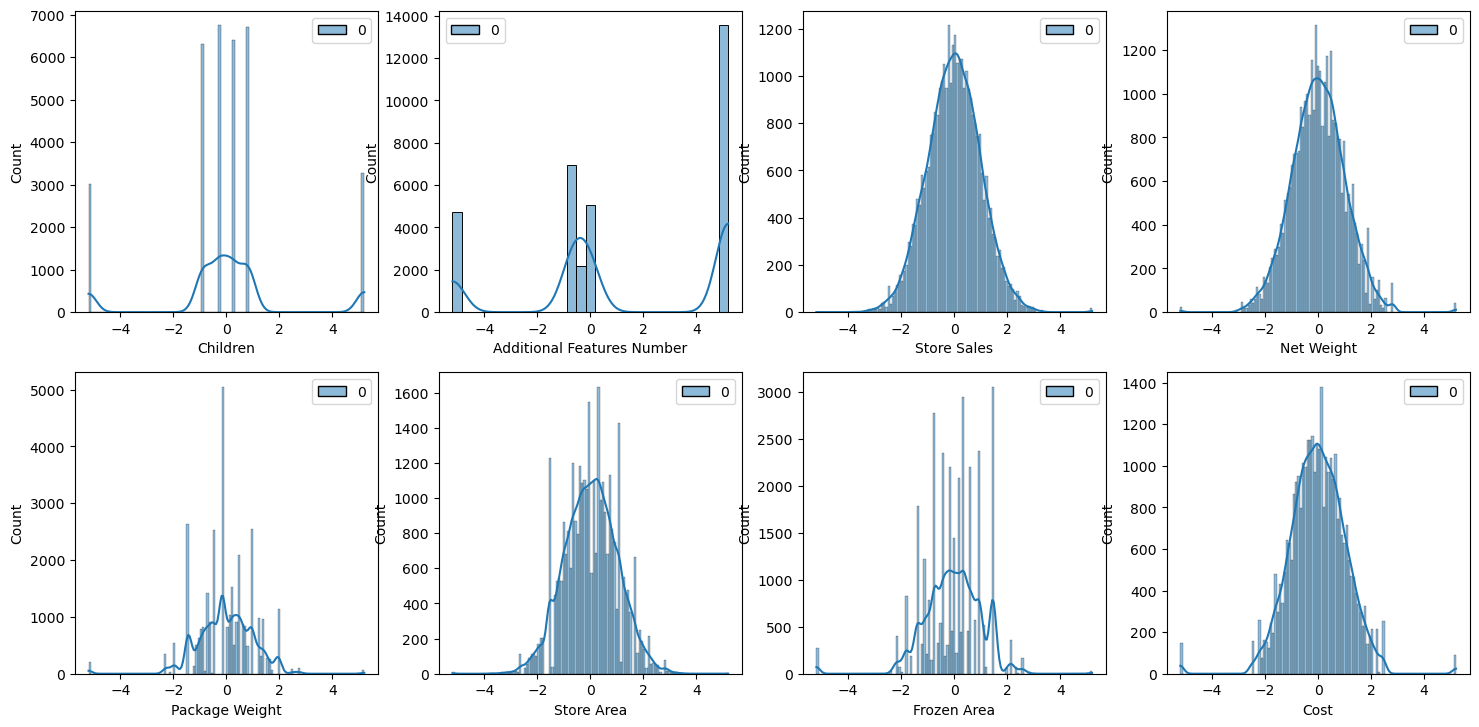

In [95]:
Quantile_Transformer = []
fig = plt.figure(figsize=(18,18))
c = 1
for col in train.select_dtypes("number").columns:
    QuantileTr = QuantileTransformer(output_distribution='normal')
    df_quantile = pd.DataFrame(QuantileTr.fit_transform(train[col].values.reshape(-1,1)))
    plt.subplot(4,4,c)
    g = sns.histplot(df_quantile, kde=True)
    g.set(xlabel = col)
    c = c + 1
    Quantile_Transformer.append(round(df_quantile.skew()[0],2))

## Clean test

In [96]:
def cleaning(data):
    for col in ['Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area']:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    
    # drop 'Unnamed: 0' column
    data.drop('Unnamed: 0', axis = 1, inplace = True)
    
    
    Status = []
    Gender = []
    Children = []
    Education = []
    Work = []
    for person in data["Person Description"]:
            Status.append(person.split()[0])
            Gender.append(person.split()[1])
            Children.append(person.split()[3])
            Education.append(person.split(": ")[1].split(" working as ")[0])
            Work.append(person.split(": ")[1].split(" working as ")[1])
    # Add the new columns
    data.insert(1, "Status", Status)
    data.insert(2, "Gender", Gender)
    data.insert(3, "Children", Children)
    data.insert(4, "Education", Education)
    data.insert(5, "Work", Work)
    # Drop the original column
    data.drop(["Person Description"], axis=1, inplace=True)
    
    
    data["Children"] = data["Children"].replace({"No":0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5})
    
    code1 = []
    code2 = []
    for code in data["Place Code"]:
            code1.append(code.split('_')[0])
            code2.append(code.split('_')[1])
    data.insert(5, "Place Code1", code1)
    data.insert(6, "Place Code2", code2)
    # Drop the original column
    data.drop(["Place Code"], axis=1, inplace=True)


    Order = []
    Department = []
    Brand = []
    for value in data["Customer Order"]:
            Order.append(value.split(' from ')[0])
            Department.append(value.split(', ')[0].split(' from ')[1])
            Brand.append(value.split(': ')[1])
    data.insert(7, 'Order', Order)
    data.insert(8, 'Department', Department)
    data.insert(9, 'Brand', Brand)
    data.drop(["Customer Order"], axis=1, inplace=True)
    
    # Replacing missing values by empty list
    data["Additional Features in market"] = data["Additional Features in market"].fillna('[]')
    features_num = data["Additional Features in market"].apply(lambda x : len(eval(x)))
    # Adding the new column
    data.insert(10, "Additional Features Number",features_num)
    # Drop the original column
    data.drop(["Additional Features in market"], axis=1, inplace=True)
    
    
    data['Is Recyclable?'] = data['Is Recyclable?'].replace({'yes':'recyclable', 'no':'non recyclable'})

    
    data["Store Sales"] = pd.Series(extract_number(data, "Store Sales")).astype('float')
    data["Store Cost"] = pd.Series(extract_number(data, "Store Cost")).astype('float')
    
    data.drop(['Meat Area', 'Grocery Area', 'Store Cost', 'Gross Weight'], axis=1, inplace=True)
    
    return data

In [97]:
test = cleaning(test)

## Split train and test datasets:¶

In [98]:
x_train = train.drop("Cost", axis=1)
y_train = train[["Cost"]]

x_test = test

In [99]:
x_train.columns

Index(['Status', 'Gender', 'Children', 'Education', 'Work', 'Place Code1',
       'Place Code2', 'Order', 'Department', 'Brand',
       'Additional Features Number', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Net Weight', 'Package Weight', 'Is Recyclable?',
       'Yearly Income', 'Store Area', 'Frozen Area'],
      dtype='object')

## Pipeline

In [100]:

ordinal_attributes = x_train.select_dtypes("object").columns
num_attributes = x_train.select_dtypes("number").columns



num_pipeline = make_pipeline(
    (SimpleImputer(strategy="median")),
    (QuantileTransformer(output_distribution='normal')),
    (StandardScaler())
)

one_hot_pipeline = make_pipeline(
    (SimpleImputer(strategy="most_frequent")),
    (OneHotEncoder())
)

ordinal_pipeline = make_pipeline(
    (SimpleImputer(strategy="most_frequent")),
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))
)

preprocessing1 = ColumnTransformer([
    #("hot", one_hot_pipeline, hot_attributes),
    ("ord", ordinal_pipeline, ordinal_attributes),
    ("num", num_pipeline, num_attributes)
])

In [101]:
x_train_ = preprocessing1.fit_transform(x_train)

In [102]:
x_test_ = preprocessing1.transform(test)

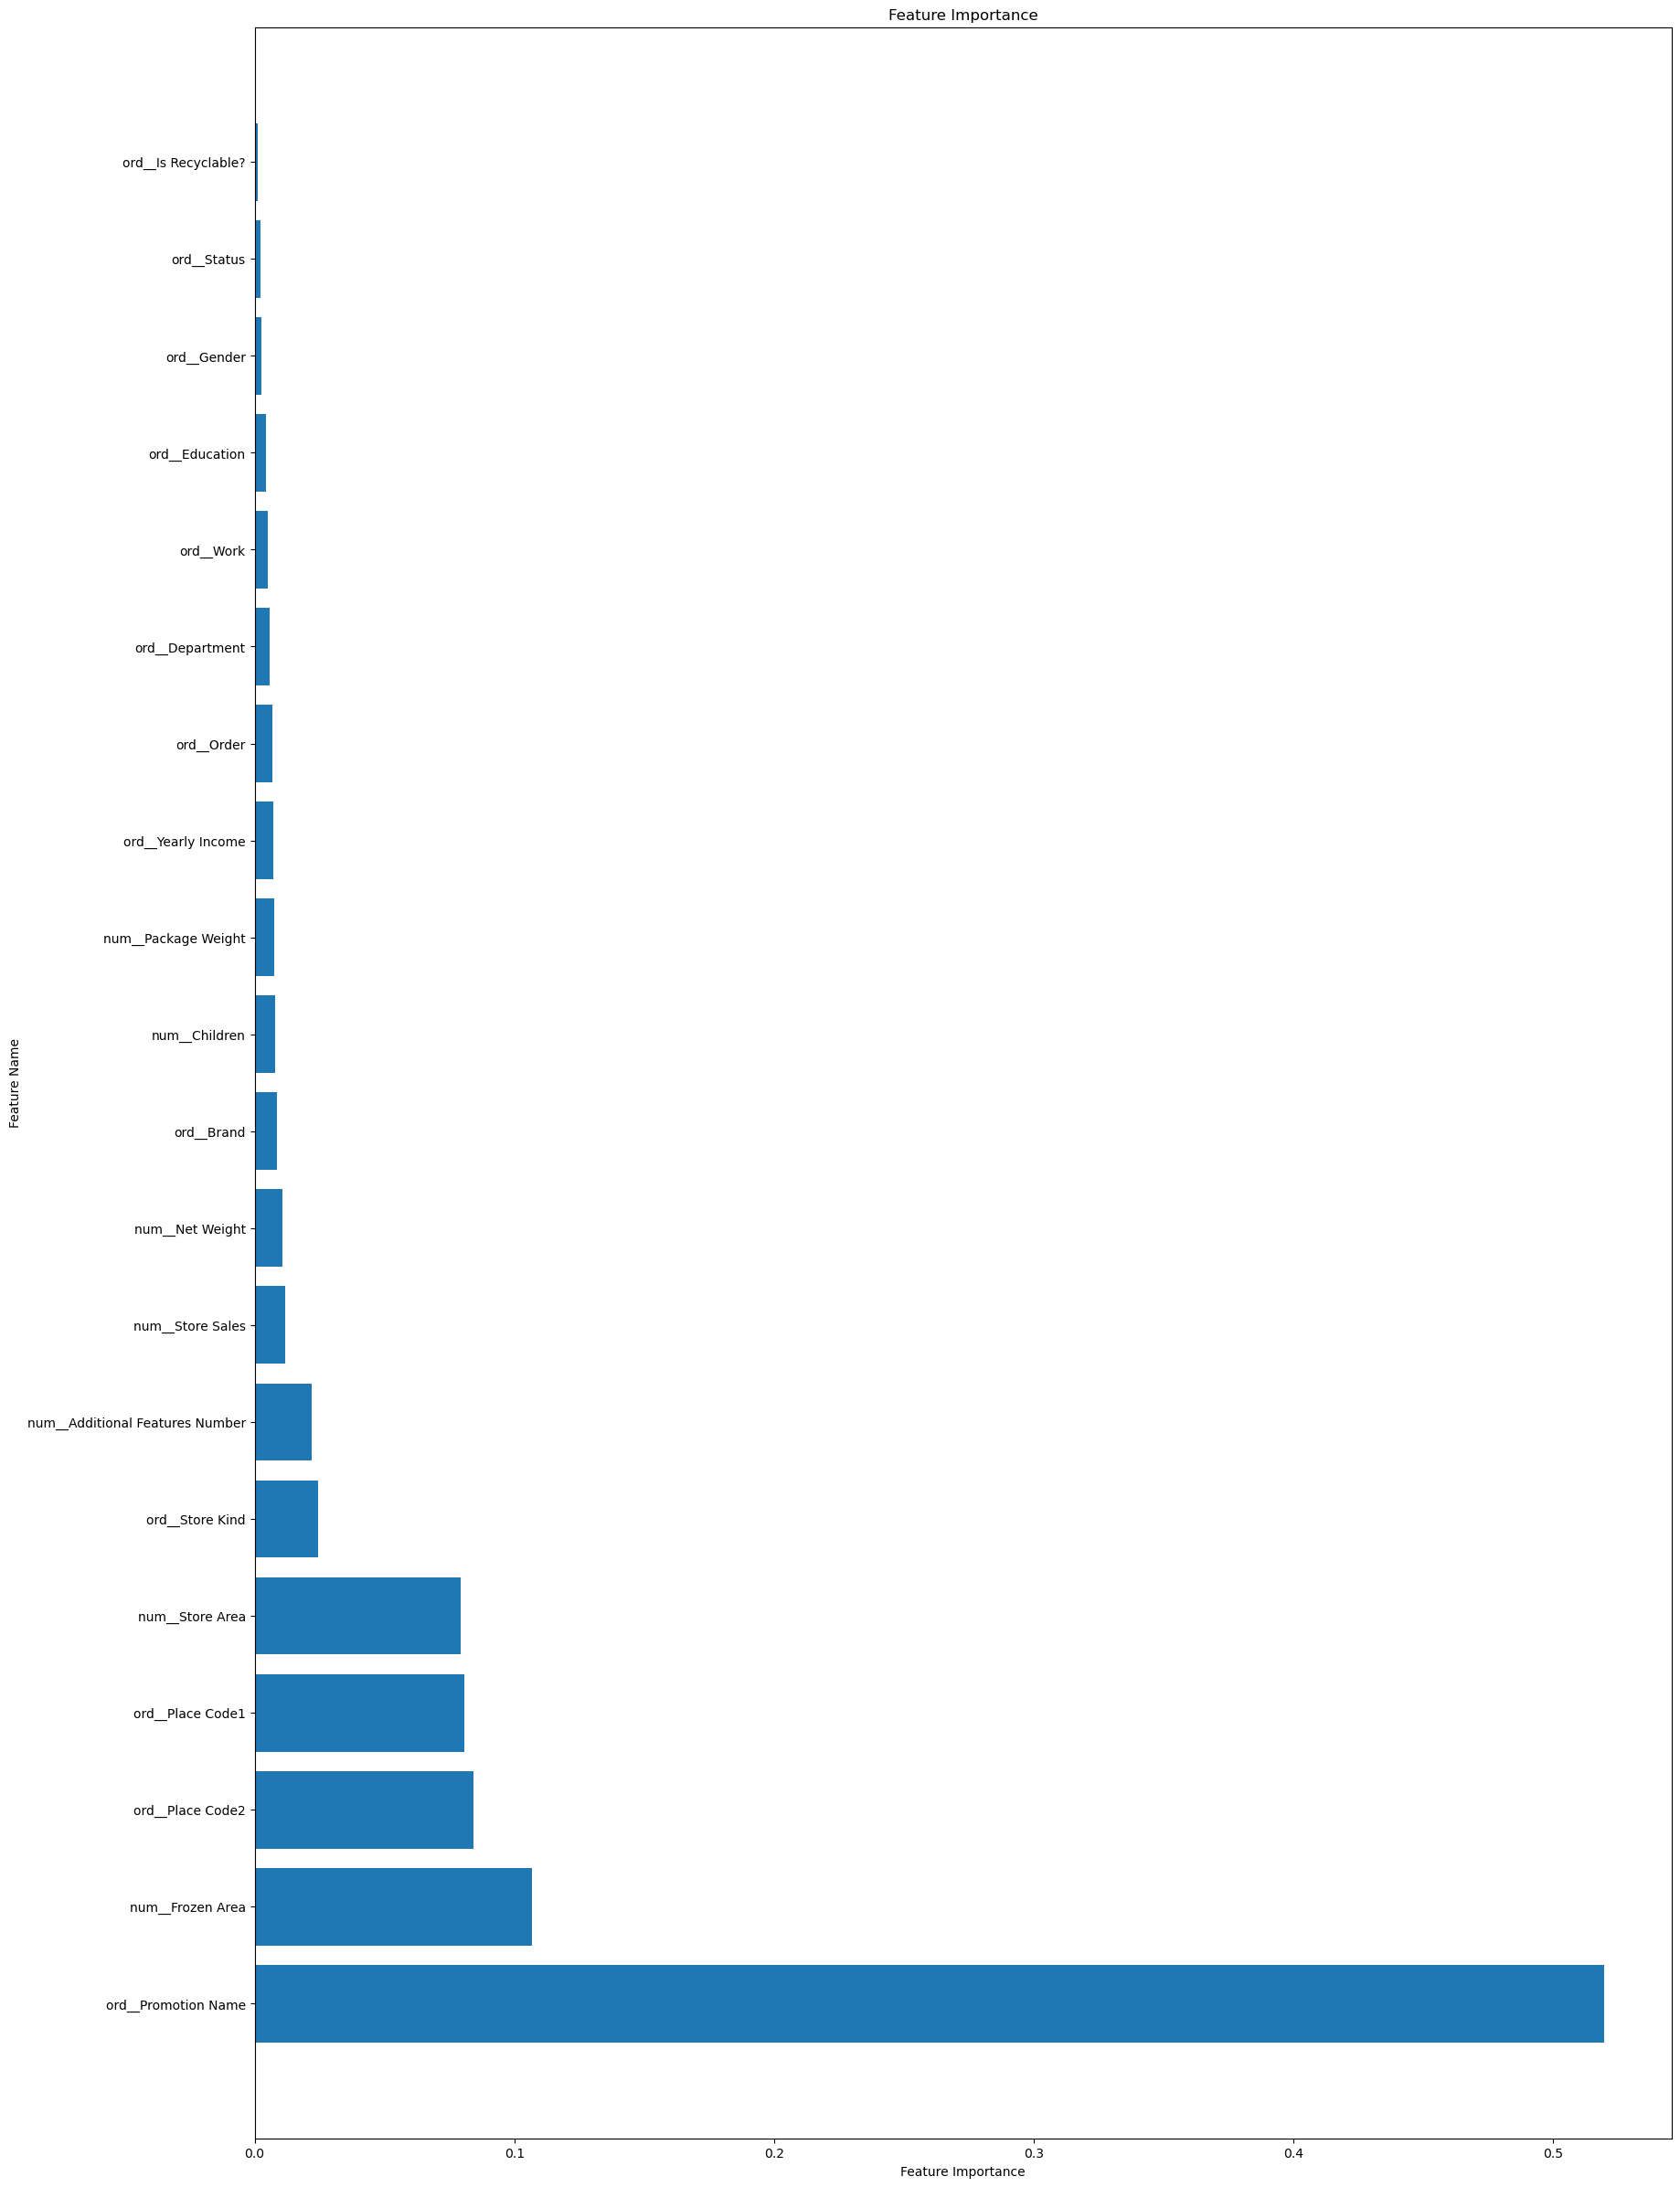

In [103]:
model = RandomForestRegressor(random_state=42)

model.fit(x_train_, y_train)

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({"Feature":preprocessing1.get_feature_names_out(), "Importance":feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#Plot the feature importances
plt.figure(figsize=(20, 30))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

In [104]:
x_train.columns

Index(['Status', 'Gender', 'Children', 'Education', 'Work', 'Place Code1',
       'Place Code2', 'Order', 'Department', 'Brand',
       'Additional Features Number', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Net Weight', 'Package Weight', 'Is Recyclable?',
       'Yearly Income', 'Store Area', 'Frozen Area'],
      dtype='object')

In [105]:
x_train__, x_valid, y_train__, y_valid = train_test_split(x_train_, y_train, 
                                                      test_size = 0.3, random_state = 42)

In [106]:
model_name= []
rmse = []
R2 = []
training_time = []

models = [
    DecisionTreeRegressor(random_state = 42),
    RandomForestRegressor(random_state = 42),
    ExtraTreesRegressor(random_state = 42)
]

for model in models :
    
    start_time = time.time()
    model.fit(x_train__ , y_train__)
    fitting_time = time.time() - start_time
    
    prediction = model.predict(x_valid)
    model_name.append(model.__class__.__name__)
    rmse.append(str(mean_squared_error(y_valid, prediction, squared=False)))
    R2.append(r2_score(y_valid, prediction))
    training_time.append(fitting_time)

In [107]:
models_df = pd.DataFrame({"model-name":model_name, "rmse": rmse,"R2":R2, 'training-time':training_time })
models_df = models_df.set_index('model-name')
models_df.sort_values("rmse")

,rmse,R2,training-time
model-name,,,
ExtraTreesRegressor,45.199130332012096,0.915989,4.475503
RandomForestRegressor,49.88067611333112,0.897685,10.103386
DecisionTreeRegressor,65.46014889328296,0.823791,0.147130


In [108]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing1),
    ("model", ExtraTreesRegressor(random_state = 42))
])

In [109]:
full_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ord',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  Index(['Status', 'Gender', 'Education', 'Work', 'Place Code1', 'Place Code2',
       'Order', 'Department', 'Brand', 'Promotion Name'...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('quantiletransformer',
                                                                   QuantileTransformer(output_distribution='normal')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Children', 'Additional Features Number', 'Store Sales', 'Net Weight',
       'Package Weight', 'Store Area', 'Frozen Area'],
      dtype='object'))])),
                ('model', ExtraTreesRegressor(random_state=42))])

In [110]:
best_model = ExtraTreesRegressor(random_state = 42)
best_model.fit(x_train_, y_train)

ExtraTreesRegressor(random_state=42)

In [111]:
final_submit = pd.DataFrame({'ID':range(19942), 'Cost':full_pipeline.predict(x_test)})

In [112]:
final_submit.to_csv("predictions.csv", index=False)

In [113]:
import pickle

pickle.dump(best_model, open('model.pkl', 'wb'))
pickle.dump(preprocessing1, open('preprocessing.pkl', 'wb'))